In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import seaborn             as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import re
%matplotlib inline

In [29]:
df = pd.read_csv('diabetic_data.csv')

## Data Cleaning


### Replacing Missing Values with Null Values

In [30]:
df.replace('?',np.nan,inplace=True)

In [31]:
# Dropping the encounter as it is irrelevant to us
df.drop('encounter_id',axis=1,inplace=True)

### Finding and Dropping Columns with High Percentage of Null Values

In [32]:
print('Column'.ljust(27," "),'Null Percentage\n')
for col in list(df.columns):
    if ((df[col].isnull().sum()*100)/df.shape[0]).round(2) > 0:
        print(col.ljust(27,' '),((df[col].isnull().sum()*100)/df.shape[0]).round(2))

Column                      Null Percentage

race                        2.23
weight                      96.86
payer_code                  39.56
medical_specialty           49.08
diag_1                      0.02
diag_2                      0.35
diag_3                      1.4


In [33]:
# Dropping Weight and Payer Code columns as there are too many null values, and are of little signficance
df.drop('weight',axis=1,inplace=True)
df.drop('payer_code',axis=1,inplace=True)
df.drop('medical_specialty',axis=1,inplace=True)

In [34]:
print('Column'.ljust(27," "),'Null Percentage\n')
for col in list(df.columns):
    if ((df[col].isnull().sum()*100)/df.shape[0]).round(2) > 0:
        print(col.ljust(27,' '),((df[col].isnull().sum()*100)/df.shape[0]).round(2))


Column                      Null Percentage

race                        2.23
diag_1                      0.02
diag_2                      0.35
diag_3                      1.4


In [35]:
df['race'].fillna(df['race'].mode()[0], inplace=True)
df['diag_1'].fillna(df['diag_1'].mode()[0], inplace=True)
df['diag_2'].fillna(df['diag_2'].mode()[0], inplace=True)
df['diag_3'].fillna(df['diag_3'].mode()[0], inplace=True)

### Filtering out  values that resulted in hospice or death

In [ ]:
#Filtering out all the values that resulted in hospice or death, as they are not relevant to this analysis.

In [36]:
df = df[df['discharge_disposition_id']!=11]
df = df[df['discharge_disposition_id']!=13]
df = df[df['discharge_disposition_id']!=14]
df = df[df['discharge_disposition_id']!=19]
df = df[df['discharge_disposition_id']!=20]
df = df[df['discharge_disposition_id']!=21]

df.shape

(99343, 46)

### Removing unknown gender and race values from data set

In [37]:
df['gender'].value_counts()

Female             53454
Male               45886
Unknown/Invalid        3
Name: gender, dtype: int64

In [38]:
df = df[df['gender']!='Unknown/Invalid']

### Keeping only unique values for each Patient ID

In [39]:
df['patient_nbr'].value_counts()

88785891     40
43140906     28
1660293      23
23199021     23
88227540     23
             ..
30029409      1
89144928      1
110370393     1
68619546      1
93251151      1
Name: patient_nbr, Length: 69987, dtype: int64

In [40]:
# Keep only first value for each patient
df.drop_duplicates(subset='patient_nbr',keep='first',inplace=True)

### Dropping columns with only one unique value

In [41]:
print('Column'.ljust(27," "),'Number of Unique Values\n')
for col in list(df.columns):
    print(col.ljust(27,' '),(df[col].nunique()))

Column                      Number of Unique Values

patient_nbr                 69987
race                        5
gender                      2
age                         10
admission_type_id           8
discharge_disposition_id    21
admission_source_id         17
time_in_hospital            14
num_lab_procedures          116
num_procedures              7
num_medications             75
number_outpatient           33
number_emergency            18
number_inpatient            13
diag_1                      694
diag_2                      723
diag_3                      756
number_diagnoses            16
max_glu_serum               4
A1Cresult                   4
metformin                   4
repaglinide                 4
nateglinide                 4
chlorpropamide              4
glimepiride                 4
acetohexamide               2
glipizide                   4
glyburide                   4
tolbutamide                 2
pioglitazone                4
rosiglitazone             

In [42]:
df.drop('examide',axis=1,inplace=True)
df.drop('citoglipton',axis=1,inplace=True)
df.drop('glimepiride-pioglitazone',axis=1,inplace=True)
df.drop('metformin-rosiglitazone',axis=1,inplace=True)

In [43]:
df.isnull().sum().sum()

0

In [44]:
df.shape

(69987, 42)

### Saving the cleaned dataset into new csv 

In [45]:
df.to_csv('cleaned.csv', index=False)

## Loading cleaned data for further analysis

In [179]:
df = pd.read_csv('cleaned.csv')

In [180]:
df.shape

(69987, 42)

In [181]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,276,250,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,Ch,Yes,NO


### Feature Engineering

In [182]:
df = df.drop('patient_nbr', axis=1)

In [183]:
#Gender

df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

In [184]:
pd.options.display.max_columns = None
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,0,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,276,250,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,0,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,Ch,Yes,>30
2,AfricanAmerican,0,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,1,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,Ch,Yes,NO
4,Caucasian,1,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69982,Caucasian,0,[70-80),1,1,7,9,50,2,33,0,0,0,574,574,250.02,9,None,>7,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,Steady,No,No,No,Ch,Yes,>30
69983,Other,0,[40-50),1,1,7,14,73,6,26,0,1,0,592,599,518,9,None,>8,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Up,No,No,No,Ch,Yes,>30
69984,Other,0,[60-70),1,1,7,2,46,6,17,1,1,1,996,585,403,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Yes,>30
69985,Caucasian,0,[80-90),1,1,7,5,76,1,22,0,1,0,292,8,304,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,Ch,Yes,NO


In [185]:
df['change'].value_counts()

No    38492
Ch    31495
Name: change, dtype: int64

In [186]:
#Change

df['change'] = df['change'].replace('No',0)
df['change'] = df['change'].replace('Ch',1)

In [187]:
# Diabetes Medication

df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

In [188]:
# Age

df['age'] = df['age'].replace('[0-10)',0)
df['age'] = df['age'].replace('[10-20)',0)
df['age'] = df['age'].replace('[20-30)',0)
df['age'] = df['age'].replace('[30-40)',0)
df['age'] = df['age'].replace('[40-50)',1)
df['age'] = df['age'].replace('[50-60)',1)
df['age'] = df['age'].replace('[60-70)',1)
df['age'] = df['age'].replace('[70-80)',2)
df['age'] = df['age'].replace('[80-90)',2)
df['age'] = df['age'].replace('[90-100)',2)

In [189]:
# Readmitted

df['readmitted'] = df['readmitted'].replace('NO', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('>30', 0)

In [190]:
# A1C Test
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)

In [191]:
# Glucose Serum Test
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)

### Creating a new feature combining three discrete features

In [192]:
df['total_patient_interaction'] = df['number_inpatient'] + df['number_emergency'] + df['number_outpatient']

df.drop('number_inpatient',axis=1,inplace=True)
df.drop('number_outpatient',axis=1,inplace=True)
df.drop('number_emergency',axis=1,inplace=True)

In [193]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,total_patient_interaction
0,Caucasian,0,0,6,25,1,1,41,0,1,250.83,276,250,1,-99,-99,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,0,0
1,Caucasian,0,0,1,1,7,3,59,0,18,276,250.01,255,9,-99,-99,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,1,1,0,0
2,AfricanAmerican,0,0,1,1,7,2,11,5,13,648,250,V27,6,-99,-99,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,0,1,0,3
3,Caucasian,1,0,1,1,7,2,44,1,16,8,250.43,403,7,-99,-99,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,1,1,0,0
4,Caucasian,1,1,1,1,7,1,51,0,8,197,157,250,5,-99,-99,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,1,1,0,0


In [194]:
df.shape

(69987, 39)

In [195]:
df['race'] = df['race'].replace('Caucasian',0)
df['race'] = df['race'].replace('AfricanAmerican',1)
df['race'] = df['race'].replace('Other',2)
df['race'] = df['race'].replace('Hispanic',2)
df['race'] = df['race'].replace('Asian',2)

In [147]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
race,69987.0,0.270093,0.535556,0.0,0.0,0.0,0.0,2.0
gender,69987.0,0.467915,0.498973,0.0,0.0,0.0,1.0,1.0
age,69987.0,1.373212,0.602101,0.0,1.0,1.0,2.0,2.0
admission_type_id,69987.0,2.106934,1.509435,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,69987.0,3.412491,5.180045,1.0,1.0,1.0,3.0,28.0
admission_source_id,69987.0,5.636461,4.165567,1.0,1.0,7.0,7.0,25.0
time_in_hospital,69987.0,4.273336,2.933987,1.0,2.0,3.0,6.0,14.0
num_lab_procedures,69987.0,42.875863,19.894291,1.0,31.0,44.0,57.0,132.0
num_procedures,69987.0,1.425379,1.757003,0.0,0.0,1.0,2.0,6.0
num_medications,69987.0,15.665281,8.287321,1.0,10.0,14.0,20.0,81.0


In [148]:
df.describe(include=object).T

,count,unique,top,freq
diag_1,69987,694,414,5209
diag_2,69987,723,250,4996
diag_3,69987,756,250,10205
metformin,69987,4,No,55083
repaglinide,69987,4,No,69070
nateglinide,69987,4,No,69496
chlorpropamide,69987,4,No,69916
glimepiride,69987,4,No,66289
acetohexamide,69987,2,No,69986
glipizide,69987,4,No,60978


### Binning of sub-categories in admission_type_id feature

In [196]:
'''
admtype_id = {1:'Emergency',
              2:'Urgent',
              3:'Elective',
              4:'Newborn',
              5:'Not Available',
              6:'NULL',
              7:'Trauma Center',
              8:'Not Mapped'}
'''
#Encoding admission type into fewer categories since emergency, urgent and trauma center explain the same thing also 
#not available, null and not mapped give us the same information.

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

In [197]:
df['admission_type_id'].value_counts()

1    48299
3    13786
5     7893
4        9
Name: admission_type_id, dtype: int64

In [198]:
df['admission_type_id'] = df['admission_type_id'].replace(1,'emergency')
df['admission_type_id'] = df['admission_type_id'].replace(3,'elective')
df['admission_type_id'] = df['admission_type_id'].replace(5,'na')
df['admission_type_id'] = df['admission_type_id'].replace(4,'newborn')

In [199]:
df['admission_type_id'].value_counts()

emergency    48299
elective     13786
na            7893
newborn          9
Name: admission_type_id, dtype: int64

### newborn sub-categories was dropped since the data belonging to it are irrelevant

In [200]:
df = df[df['admission_type_id'] != 'newborn']
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,total_patient_interaction
0,0,0,0,na,25,1,1,41,0,1,250.83,276,250,1,-99,-99,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,0,0
1,0,0,0,emergency,1,7,3,59,0,18,276,250.01,255,9,-99,-99,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,1,1,0,0
2,1,0,0,emergency,1,7,2,11,5,13,648,250,V27,6,-99,-99,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,0,1,0,3
3,0,1,0,emergency,1,7,2,44,1,16,8,250.43,403,7,-99,-99,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,1,1,0,0
4,0,1,1,emergency,1,7,1,51,0,8,197,157,250,5,-99,-99,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69982,0,0,2,emergency,1,7,9,50,2,33,574,574,250.02,9,-99,1,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,Steady,No,No,No,1,1,0,0
69983,2,0,1,emergency,1,7,14,73,6,26,592,599,518,9,-99,1,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Up,No,No,No,1,1,0,1
69984,2,0,1,emergency,1,7,2,46,6,17,996,585,403,9,-99,-99,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,0,1,0,3
69985,0,0,2,emergency,1,7,5,76,1,22,292,8,304,9,-99,-99,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,1,1,0,1


### Binning admission_source_id feature

In [201]:
'''
admsource_id = {1:' Physician Referral', 
                2:'Clinic Referral', 
                3:'HMO Referral', 
                4:'Transfer from a hospital',
                5:'Transfer from a Skilled Nursing Facility (SNF)', 
                6:'Transfer from another health care facility', 
                7:'Emergency Room', 
                8:'Court/Law Enforcement', 
                9:'Not Available', 
                10:'Transfer from critial access hospital',
                11:'Normal Delivery', 
                12:'Premature Delivery', 
                13:'Sick Baby', 
                14:'Extramural Birth', 
                15:'Not Available',
                17:'NULL', 
                18:'Transfer From Another Home Health Agency', 
                19:'Readmission to Same Home Health Agency',
                20:'Not Mapped', 
                21:'Unknown/Invalid', 
                22:'Transfer from hospital inpt/same fac reslt in a sep claim',
                23:'Born inside this hospital', 
                24:'Born outside this hospital', 
                25:'Transfer from Ambulatory Surgery Center',
                26:'Transfer from Hospice'}
'''
df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)

df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)

df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)

df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

# 1-Referral, 4-Transfer, 7-EmergencyRoom, 8-Court/Law, 9-Not Available, 11-Newborn


In [202]:
df['admission_source_id'].value_counts()

7     37269
1     22790
9      5069
4      4836
8        11
11        3
Name: admission_source_id, dtype: int64

In [203]:
df['admission_source_id'] = df['admission_source_id'].replace(7,'emergency')
df['admission_source_id'] = df['admission_source_id'].replace(1,'referral')
df['admission_source_id'] = df['admission_source_id'].replace(9,'na')
df['admission_source_id'] = df['admission_source_id'].replace(4,'transfer')
df['admission_source_id'] = df['admission_source_id'].replace(8,'court/law')
df['admission_source_id'] = df['admission_source_id'].replace(11,'newborn')

In [204]:
df['admission_source_id'].value_counts()

emergency    37269
referral     22790
na            5069
transfer      4836
court/law       11
newborn          3
Name: admission_source_id, dtype: int64

In [205]:
df = df[df['admission_source_id'] != 'newborn']

### Binning discharge_disposition_id feature

In [206]:
'''
Discharge_Disposition_ID
dd_id = {1:'Discharged to home', 2:'Discharged/transferred to another short term hospital', 
         3:'Discharged/transferred to SNF',4:'Discharged/transferred to ICF', 
         5:'Discharged/transferred to another type of inpatient care institution',
         6:'Discharged/transferred to home with home health service', 7:'Left AMA',
         8:'Discharged/transferred to home under care of Home IV provider', 
         9:'Admitted as an inpatient to this hospital',
         10:'Neonate discharged to another hospital for neonatal aftercare', 
         11:'Expired',
         12:'Still patient or expected to return for outpatient services', 
         13:'Hospice / home', 
         14:'Hospice / medical facility',
         15:'Discharged/transferred within this institution to Medicare approved swing bed',
         16:'Discharged/transferred/referred another institution for outpatient services',
         17:'Discharged/transferred/referred to this institution for outpatient services', 
         18:'NULL',
         19:'Expired at home. Medicaid only, hospice.', 
         20:'Expired in a medical facility. Medicaid only, hospice.',
         21:'Expired, place unknown. Medicaid only, hospice.', 
         22:'Discharged/transferred to another rehab fac including rehab units of a hospital .',
         23:'Discharged/transferred to a long term care hospital.',
         24:'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
         25:'Not Mapped', 
         26:'Unknown/Invalid', 
         27:'Discharged/transferred to a federal health care facility.',
         28:'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
         29:'Discharged/transferred to a Critical Access Hospital (CAH).',
         30:'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'}
'''
#Encoding discharge type into fewer categories

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(28,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(27,2)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,9)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,9)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)

# 1-Discharged to home, 2-Transferred to other inpatient, 7-Left AMA, 9-Incoming patient, 12-Under treatment, 18-Null,10=newborn

In [207]:
df['discharge_disposition_id'].value_counts()

1     52672
2     13577
18     3252
7       409
9        57
10        6
12        2
Name: discharge_disposition_id, dtype: int64

In [208]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(1,'discharged_home')
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(2,'transferred')
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(18,'na')
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(7,'left_AMA')
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,'under_treatment')
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,'inpatient')
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(10,'newborn')

In [209]:
df['discharge_disposition_id'].value_counts()

discharged_home    52672
transferred        13577
na                  3252
left_AMA             409
inpatient             57
newborn                6
under_treatment        2
Name: discharge_disposition_id, dtype: int64

In [210]:
df = df[df.discharge_disposition_id != 'newborn']

In [211]:
df.shape

(69969, 39)

### Creating a new feature using all medications category which will incorporate number of times the medications was changed or was steady

In [212]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'total_patient_interaction'],
      dtype='object')

In [213]:
meds = list(df.columns[16:35])
for col in meds:
    df[col] = df[col].replace('No',0)
    df[col] = df[col].replace('Steady',0)
    df[col] = df[col].replace('Up',1)
    df[col] = df[col].replace('Down',1)

# Condense 19 columns into 1 by adding all changes
df['numchange'] = 0
for col in meds:
    colname = str(col) + 'temp'
    df[colname] = df[col]

for col in meds:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts()

for col in meds:
    df.drop(col,axis=1,inplace=True)

In [214]:
df.shape

(69969, 21)

### ICD9 Codes encoding of features diag_1, diag_2 and diag_3

In [217]:
def diagnosis(feature):
    for k in df[feature]:
        if re.search('^[1-9]',k):
            if float(k)<=139.9:
                df[feature] = df[feature].replace(k,'Infectious and Parasitic Disease')
            elif float(k)<=239.9:
                df[feature] = df[feature].replace(k,'Neoplasms')
            elif float(k)<=279.9:
                df[feature] = df[feature].replace(k,'Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders')
            elif float(k)<=289.9:
                df[feature] = df[feature].replace(k,'Diseases of Blood and Blood Forming Organs')
            elif float(k)<=319:
                df[feature] = df[feature].replace(k,'Mental Disorders')
            elif float(k)<=389.9:
                df[feature] = df[feature].replace(k,'Diseases of Nervous System and Sense Organs')
            elif float(k)<=459.9:
                df[feature] = df[feature].replace(k,'Diseases of circulatory system')
            elif float(k)<=519.9:
                df[feature] = df[feature].replace(k,'Diseases of respiratory system')
            elif float(k)<=579.9:
                df[feature] = df[feature].replace(k,'Diseases of the Digestive System')
            elif float(k)<=629.9:
                df[feature] = df[feature].replace(k,'Diseases of the Genitourinary System')
            elif float(k)<=676.9:
                df[feature] = df[feature].replace(k,'Complications of Pregnancy, Childbirth and the Puerperium')
            elif float(k)<=709.9:
                df[feature] = df[feature].replace(k,'Diseases of the Skin and Subcutaneous Tissue')	
            elif float(k)<=739.9:
                df[feature] = df[feature].replace(k,'Diseases of the Musculoskeletal System and Connective Tissue')
            elif float(k)<=759.9:
                df[feature] = df[feature].replace(k,'Congenital Anomalies')
            elif float(k)<=779.9:
                df[feature] = df[feature].replace(k,'Certain Conditions Originating in the Perinatal Period')
            elif float(k)<=799.9:
                df[feature] = df[feature].replace(k,'Symptoms, Signs and Ill-defined Conditions')
            elif float(k)<=999.9:
                df[feature] = df[feature].replace(k,'Injury and Poisoning')
        elif re.search('^V',k):
            df[feature] = df[feature].replace(k, 'Supplementary Factors Influencing Health Status and Contact with Health Services')
        
        elif re.search('^E.*[0-9]$',k):
            df[feature] = df[feature].replace(k, 'Supplementary Classification Of External Causes Of Injury And Poisoning ')



In [218]:
diagnosis('diag_1')
diagnosis('diag_2')
diagnosis('diag_3')

In [222]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_patient_interaction,numchange
0,0,0,0,na,na,referral,1,41,0,1,"Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...",1,-99,-99,0,0,0,0,0
1,0,0,0,emergency,discharged_home,emergency,3,59,0,18,"Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...",9,-99,-99,1,1,0,0,1
2,1,0,0,emergency,discharged_home,emergency,2,11,5,13,"Complications of Pregnancy, Childbirth and the...","Endocrine, Nutritional and Metabolic Diseases ...",Supplementary Factors Influencing Health Statu...,6,-99,-99,0,1,0,3,0
3,0,1,0,emergency,discharged_home,emergency,2,44,1,16,Infectious and Parasitic Disease,"Endocrine, Nutritional and Metabolic Diseases ...",Diseases of circulatory system,7,-99,-99,1,1,0,0,1
4,0,1,1,emergency,discharged_home,emergency,1,51,0,8,Neoplasms,Neoplasms,"Endocrine, Nutritional and Metabolic Diseases ...",5,-99,-99,1,1,0,0,0


## Significance Testing of features

In [223]:
num_cols = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses',
            'total_patient_interaction','numchange']

In [224]:
from scipy.stats import mannwhitneyu
a = df.groupby(by='readmitted')
df_0 = a.get_group(0)
df_1 = a.get_group(1)
for col in num_cols:
    p_val = mannwhitneyu(df_0[col],df_1[col])[1]
    print(col, p_val)

time_in_hospital 1.5789879185425666e-56
num_lab_procedures 4.753347483775933e-18
num_procedures 0.1763327250486088
num_medications 1.1881075905695302e-29
number_diagnoses 1.9120652385376933e-30
total_patient_interaction 8.475030378200047e-67
numchange 5.967781471762599e-10


In [225]:
from scipy.stats import ttest_ind
a = df.groupby(by='readmitted')
df_0 = a.get_group(0)
df_1 = a.get_group(1)
for col in num_cols:
    p_val = ttest_ind(df_0[col],df_1[col])[1]
    print(col, p_val)

time_in_hospital 1.7303052201228255e-49
num_lab_procedures 2.0693470867097767e-17
num_procedures 0.9527660385505273
num_medications 9.482715902781024e-22
number_diagnoses 1.956518688960269e-33
total_patient_interaction 1.5232673076621785e-54
numchange 3.6950910381061948e-09


In [226]:
#num_procedures is found to insignificant as p_value>0.05

In [227]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_patient_interaction,numchange
0,0,0,0,na,na,referral,1,41,0,1,"Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...",1,-99,-99,0,0,0,0,0
1,0,0,0,emergency,discharged_home,emergency,3,59,0,18,"Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...",9,-99,-99,1,1,0,0,1
2,1,0,0,emergency,discharged_home,emergency,2,11,5,13,"Complications of Pregnancy, Childbirth and the...","Endocrine, Nutritional and Metabolic Diseases ...",Supplementary Factors Influencing Health Statu...,6,-99,-99,0,1,0,3,0
3,0,1,0,emergency,discharged_home,emergency,2,44,1,16,Infectious and Parasitic Disease,"Endocrine, Nutritional and Metabolic Diseases ...",Diseases of circulatory system,7,-99,-99,1,1,0,0,1
4,0,1,1,emergency,discharged_home,emergency,1,51,0,8,Neoplasms,Neoplasms,"Endocrine, Nutritional and Metabolic Diseases ...",5,-99,-99,1,1,0,0,0


In [228]:
df['race'] = df['race'].replace(0,'Caucasian')
df['race'] = df['race'].replace(1,'AfricanAmerican')
df['race'] = df['race'].replace(2,'Other')

In [229]:
df['age'] = df['age'].replace(1,'41-70')
df['age'] = df['age'].replace(2,'71-100')
df['age'] = df['age'].replace(0,'0-40')

In [230]:
df['max_glu_serum'] = df['max_glu_serum'].replace(-99,'not_tested')
df['max_glu_serum'] = df['max_glu_serum'].replace(0,'normal')
df['max_glu_serum'] = df['max_glu_serum'].replace(1,'abnormal')

df['A1Cresult'] = df['A1Cresult'].replace(-99,'not tested')
df['A1Cresult'] = df['A1Cresult'].replace(1,'abnormal')
df['A1Cresult'] = df['A1Cresult'].replace(0,'normal')

In [231]:
df['gender'] = df['gender'].replace(0,'Female')
df['gender'] = df['gender'].replace(1,'Male')

In [232]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_patient_interaction,numchange
0,Caucasian,Female,0-40,na,na,referral,1,41,0,1,"Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...",1,not_tested,not tested,0,0,0,0,0
1,Caucasian,Female,0-40,emergency,discharged_home,emergency,3,59,0,18,"Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...",9,not_tested,not tested,1,1,0,0,1
2,AfricanAmerican,Female,0-40,emergency,discharged_home,emergency,2,11,5,13,"Complications of Pregnancy, Childbirth and the...","Endocrine, Nutritional and Metabolic Diseases ...",Supplementary Factors Influencing Health Statu...,6,not_tested,not tested,0,1,0,3,0
3,Caucasian,Male,0-40,emergency,discharged_home,emergency,2,44,1,16,Infectious and Parasitic Disease,"Endocrine, Nutritional and Metabolic Diseases ...",Diseases of circulatory system,7,not_tested,not tested,1,1,0,0,1
4,Caucasian,Male,41-70,emergency,discharged_home,emergency,1,51,0,8,Neoplasms,Neoplasms,"Endocrine, Nutritional and Metabolic Diseases ...",5,not_tested,not tested,1,1,0,0,0


In [233]:
df['change'] = df['change'].replace(0,'No')
df['change'] = df['change'].replace(1,'Yes')

df['diabetesMed'] = df['diabetesMed'].replace(0,'No')
df['diabetesMed'] = df['diabetesMed'].replace(1,'Yes')

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69969 entries, 0 to 69986
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   race                       69969 non-null  object
 1   gender                     69969 non-null  object
 2   age                        69969 non-null  object
 3   admission_type_id          69969 non-null  object
 4   discharge_disposition_id   69969 non-null  object
 5   admission_source_id        69969 non-null  object
 6   time_in_hospital           69969 non-null  int64 
 7   num_lab_procedures         69969 non-null  int64 
 8   num_procedures             69969 non-null  int64 
 9   num_medications            69969 non-null  int64 
 10  diag_1                     69969 non-null  object
 11  diag_2                     69969 non-null  object
 12  diag_3                     69969 non-null  object
 13  number_diagnoses           69969 non-null  int64 
 14  max_gl

In [239]:
cat_list = ['race','age','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','admission_source_id',
            'discharge_disposition_id','admission_type_id','gender','change','diabetesMed']

In [240]:
sig_list=[]
insig_list=[]
for k in cat_list:
    cross_ms = pd.crosstab(df['readmitted'], df[k])
    chi_stat, p_val, dof, arr =  stats.chi2_contingency(cross_ms)
    if p_val<0.05:
        sig_list.append(k)
        print('feature :{}    p value ={}'.format(k,p_val))
    else:
        insig_list.append(k)

feature :race    p value =0.01156777729017974
feature :age    p value =7.242900954822777e-32
feature :diag_1    p value =1.5276502790614604e-22
feature :diag_2    p value =2.2666258843570562e-12
feature :diag_3    p value =6.829342273688782e-14
feature :max_glu_serum    p value =0.03486922537318607
feature :A1Cresult    p value =0.033122828236032846
feature :discharge_disposition_id    p value =1.0799368269869092e-179
feature :admission_type_id    p value =0.005178821583595248
feature :change    p value =0.0001273004517732613
feature :diabetesMed    p value =2.628609551510392e-13


In [241]:
insig_list

['admission_source_id', 'gender']

In [242]:
#admission_soure_id, gender are found to be insignificant

### Dropping insignificant features

In [243]:
df1 = df

In [244]:
df1 = df1.drop(['admission_source_id','gender','num_procedures'],1)


### Saving all the preprocessed data into new csv data

In [245]:
df1.to_csv('significant.csv', index=False)

In [246]:
df2 = df1
df2

,race,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_patient_interaction,numchange
0,Caucasian,0-40,na,na,1,41,1,"Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...",1,not_tested,not tested,No,No,0,0,0
1,Caucasian,0-40,emergency,discharged_home,3,59,18,"Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...",9,not_tested,not tested,Yes,Yes,0,0,1
2,AfricanAmerican,0-40,emergency,discharged_home,2,11,13,"Complications of Pregnancy, Childbirth and the...","Endocrine, Nutritional and Metabolic Diseases ...",Supplementary Factors Influencing Health Statu...,6,not_tested,not tested,No,Yes,0,3,0
3,Caucasian,0-40,emergency,discharged_home,2,44,16,Infectious and Parasitic Disease,"Endocrine, Nutritional and Metabolic Diseases ...",Diseases of circulatory system,7,not_tested,not tested,Yes,Yes,0,0,1
4,Caucasian,41-70,emergency,discharged_home,1,51,8,Neoplasms,Neoplasms,"Endocrine, Nutritional and Metabolic Diseases ...",5,not_tested,not tested,Yes,Yes,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69982,Caucasian,71-100,emergency,discharged_home,9,50,33,Diseases of the Digestive System,Diseases of the Digestive System,"Endocrine, Nutritional and Metabolic Diseases ...",9,not_tested,abnormal,Yes,Yes,0,0,1
69983,Other,41-70,emergency,discharged_home,14,73,26,Diseases of the Genitourinary System,Diseases of the Genitourinary System,Diseases of respiratory system,9,not_tested,abnormal,Yes,Yes,0,1,1
69984,Other,41-70,emergency,discharged_home,2,46,17,Injury and Poisoning,Diseases of the Genitourinary System,Diseases of circulatory system,9,not_tested,not tested,No,Yes,0,3,0
69985,Caucasian,71-100,emergency,discharged_home,5,76,22,Mental Disorders,Infectious and Parasitic Disease,Mental Disorders,9,not_tested,not tested,Yes,Yes,0,1,1


### One hot encoding of categorical variables

In [255]:
cat_cols = ['race','age','admission_type_id','discharge_disposition_id','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult',
            'change','diabetesMed']

In [248]:
dummies = pd.get_dummies(df2[cat_cols])

In [249]:
dummies

,race_AfricanAmerican,race_Caucasian,race_Other,age_0-40,age_41-70,age_71-100,admission_type_id_elective,admission_type_id_emergency,admission_type_id_na,discharge_disposition_id_discharged_home,discharge_disposition_id_inpatient,discharge_disposition_id_left_AMA,discharge_disposition_id_na,discharge_disposition_id_transferred,discharge_disposition_id_under_treatment,"diag_1_Complications of Pregnancy, Childbirth and the Puerperium",diag_1_Congenital Anomalies,diag_1_Diseases of Blood and Blood Forming Organs,diag_1_Diseases of Nervous System and Sense Organs,diag_1_Diseases of circulatory system,diag_1_Diseases of respiratory system,diag_1_Diseases of the Digestive System,diag_1_Diseases of the Genitourinary System,diag_1_Diseases of the Musculoskeletal System and Connective Tissue,diag_1_Diseases of the Skin and Subcutaneous Tissue,"diag_1_Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders",diag_1_Infectious and Parasitic Disease,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Neoplasms,diag_1_Supplementary Classification Of External Causes Of Injury And Poisoning,diag_1_Supplementary Factors Influencing Health Status and Contact with Health Services,"diag_1_Symptoms, Signs and Ill-defined Conditions","diag_2_Complications of Pregnancy, Childbirth and the Puerperium",diag_2_Congenital Anomalies,diag_2_Diseases of Blood and Blood Forming Organs,diag_2_Diseases of Nervous System and Sense Organs,diag_2_Diseases of circulatory system,diag_2_Diseases of respiratory system,diag_2_Diseases of the Digestive System,diag_2_Diseases of the Genitourinary System,diag_2_Diseases of the Musculoskeletal System and Connective Tissue,diag_2_Diseases of the Skin and Subcutaneous Tissue,"diag_2_Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders",diag_2_Infectious and Parasitic Disease,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Neoplasms,diag_2_Supplementary Classification Of External Causes Of Injury And Poisoning,diag_2_Supplementary Factors Influencing Health Status and Contact with Health Services,"diag_2_Symptoms, Signs and Ill-defined Conditions","diag_3_Complications of Pregnancy, Childbirth and the Puerperium",diag_3_Congenital Anomalies,diag_3_Diseases of Blood and Blood Forming Organs,diag_3_Diseases of Nervous System and Sense Organs,diag_3_Diseases of circulatory system,diag_3_Diseases of respiratory system,diag_3_Diseases of the Digestive System,diag_3_Diseases of the Genitourinary System,diag_3_Diseases of the Musculoskeletal System and Connective Tissue,diag_3_Diseases of the Skin and Subcutaneous Tissue,"diag_3_Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders",diag_3_Infectious and Parasitic Disease,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Neoplasms,diag_3_Supplementary Classification Of External Causes Of Injury And Poisoning,diag_3_Supplementary Factors Influencing Health Status and Contact with Health Services,"diag_3_Symptoms, Signs and Ill-defined Conditions",max_glu_serum_abnormal,max_glu_serum_normal,max_glu_serum_not_tested,A1Cresult_abnormal,A1Cresult_normal,A1Cresult_not tested,change_No,change_Yes,diabetesMed_No,diabetesMed_Yes
0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
2,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1
3,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
4,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
...,..

In [250]:
dummies.shape

(69969, 79)

In [251]:
df2 = df2.drop(cat_cols,1)

In [252]:
df2 = pd.concat([df2,dummies],axis=1)

In [253]:
df2.shape

(69969, 86)

In [254]:
df2

,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,readmitted,total_patient_interaction,numchange,race_AfricanAmerican,race_Caucasian,race_Other,age_0-40,age_41-70,age_71-100,admission_type_id_elective,admission_type_id_emergency,admission_type_id_na,discharge_disposition_id_discharged_home,discharge_disposition_id_inpatient,discharge_disposition_id_left_AMA,discharge_disposition_id_na,discharge_disposition_id_transferred,discharge_disposition_id_under_treatment,"diag_1_Complications of Pregnancy, Childbirth and the Puerperium",diag_1_Congenital Anomalies,diag_1_Diseases of Blood and Blood Forming Organs,diag_1_Diseases of Nervous System and Sense Organs,diag_1_Diseases of circulatory system,diag_1_Diseases of respiratory system,diag_1_Diseases of the Digestive System,diag_1_Diseases of the Genitourinary System,diag_1_Diseases of the Musculoskeletal System and Connective Tissue,diag_1_Diseases of the Skin and Subcutaneous Tissue,"diag_1_Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders",diag_1_Infectious and Parasitic Disease,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Neoplasms,diag_1_Supplementary Classification Of External Causes Of Injury And Poisoning,diag_1_Supplementary Factors Influencing Health Status and Contact with Health Services,"diag_1_Symptoms, Signs and Ill-defined Conditions","diag_2_Complications of Pregnancy, Childbirth and the Puerperium",diag_2_Congenital Anomalies,diag_2_Diseases of Blood and Blood Forming Organs,diag_2_Diseases of Nervous System and Sense Organs,diag_2_Diseases of circulatory system,diag_2_Diseases of respiratory system,diag_2_Diseases of the Digestive System,diag_2_Diseases of the Genitourinary System,diag_2_Diseases of the Musculoskeletal System and Connective Tissue,diag_2_Diseases of the Skin and Subcutaneous Tissue,"diag_2_Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders",diag_2_Infectious and Parasitic Disease,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Neoplasms,diag_2_Supplementary Classification Of External Causes Of Injury And Poisoning,diag_2_Supplementary Factors Influencing Health Status and Contact with Health Services,"diag_2_Symptoms, Signs and Ill-defined Conditions","diag_3_Complications of Pregnancy, Childbirth and the Puerperium",diag_3_Congenital Anomalies,diag_3_Diseases of Blood and Blood Forming Organs,diag_3_Diseases of Nervous System and Sense Organs,diag_3_Diseases of circulatory system,diag_3_Diseases of respiratory system,diag_3_Diseases of the Digestive System,diag_3_Diseases of the Genitourinary System,diag_3_Diseases of the Musculoskeletal System and Connective Tissue,diag_3_Diseases of the Skin and Subcutaneous Tissue,"diag_3_Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders",diag_3_Infectious and Parasitic Disease,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Neoplasms,diag_3_Supplementary Classification Of External Causes Of Injury And Poisoning,diag_3_Supplementary Factors Influencing Health Status and Contact with Health Services,"diag_3_Symptoms, Signs and Ill-defined Conditions",max_glu_serum_abnormal,max_glu_serum_normal,max_glu_serum_not_tested,A1Cresult_abnormal,A1Cresult_normal,A1Cresult_not tested,change_No,change_Yes,diabetesMed_No,diabetesMed_Yes
0,1,41,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
1,3,59,18,9,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
2,2,11,13,6,0,3,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1
3,2,44,16,7,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

### Saving one hot encoded final dataset into a new csv dataset 
### This dataset is final and used for all model building

In [257]:
df2.to_csv('dummies.csv', index=False)

### Data processing for feature importance analysis

In [259]:
X = df2.drop('readmitted',axis=1)
y = df2['readmitted']

In [260]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X.columns
os_data_X,os_data_y=os.fit_sample(X, y)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['readmitted'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['readmitted']==0]))
print("Number of subscription",len(os_data_y[os_data_y['readmitted']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['readmitted']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['readmitted']==1])/len(os_data_X))

Using TensorFlow backend.


length of oversampled data is  127370
Number of no subscription in oversampled data 63685
Number of subscription 63685
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [261]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)

## Feature Importance

In [262]:
from sklearn.ensemble import RandomForestClassifier
RF_S = RandomForestClassifier(n_estimators = 38, criterion = "gini", min_samples_split=10)
RF_S.fit(X_train, y_train)

rm_prd =  RF_S.predict(X_test)
cr = classification_report(y_test,rm_prd)
print(cr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19034
           1       1.00      0.90      0.95     19177

    accuracy                           0.95     38211
   macro avg       0.95      0.95      0.95     38211
weighted avg       0.95      0.95      0.95     38211



### Features having influence more than 5%

W0530 12:23:04.012135 140670629295936 font_manager.py:1282] findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


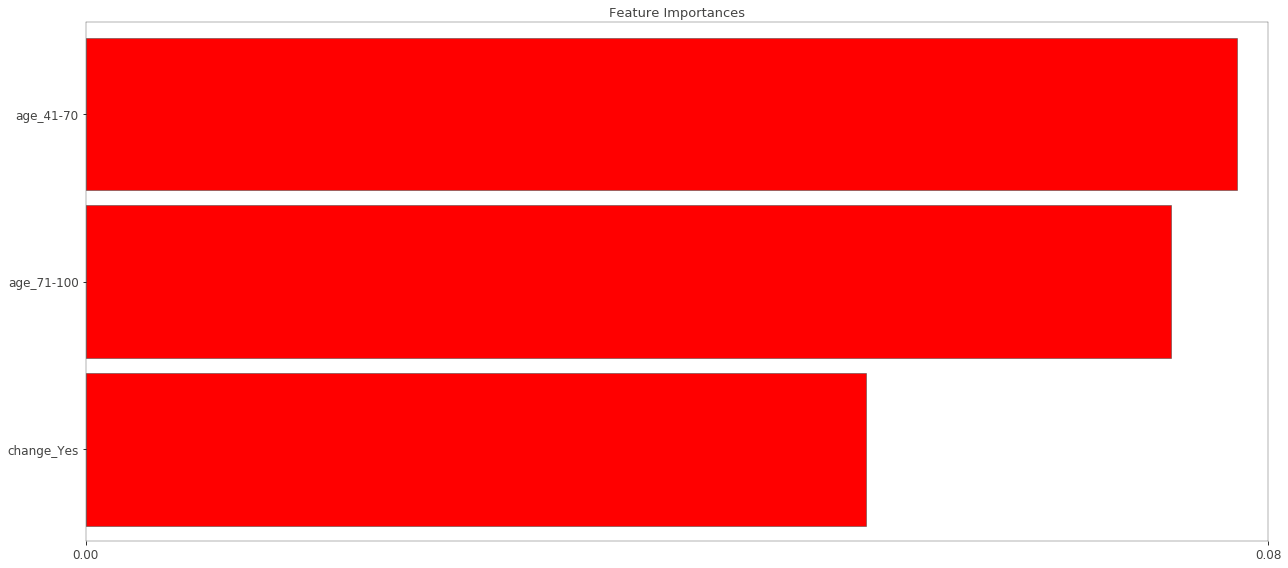

In [263]:
from rfpimp import *

imp = importances(RF_S, X_test, y_test, n_samples=-1)
imp_feat = imp[imp['Importance']>=0.05]

viz = plot_importances(imp_feat, color='#FF0000',label_fontsize=12, imp_range=(0,0.04)
                       , title='Feature Importances',
    width=18,
    minheight=8)
viz.view()

## Top 3 important features

In [266]:
imp_feat

,Importance
Feature,
age_41-70,0.074298
age_71-100,0.070006
change_Yes,0.050352


In [267]:
x = df['discharge_disposition_id'][df['readmitted']==0].value_counts()
y = df['discharge_disposition_id'][df['readmitted']==1].value_counts()

In [268]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [269]:
x['percent'] = x['discharge_disposition_id']*100/63685
y['percent'] = y['discharge_disposition_id']*100/6283

In [270]:
x

,discharge_disposition_id,percent
discharged_home,48796,76.620868
transferred,11528,18.101594
na,2953,4.636885
left_AMA,370,0.580985
inpatient,37,0.058098
under_treatment,1,0.001570


In [271]:
y

,discharge_disposition_id,percent
discharged_home,3876,61.690275
transferred,2049,32.611810
na,299,4.758873
left_AMA,39,0.620723
inpatient,20,0.318319
under_treatment,1,0.015916


In [272]:
3876*100/(48796+3876)

7.358748481166464

## Clustering Analysis

### Clustering is to be done without dummy variables since k-mode is to be used and it needs label_encoded features

In [273]:
clust_df = pd.read_csv('significant.csv')
print(clust_df.shape)
clust_df.head()

(69969, 18)


,race,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_patient_interaction,numchange
0,Caucasian,0-40,na,na,1,41,1,"Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...",1,not_tested,not tested,No,No,0,0,0
1,Caucasian,0-40,emergency,discharged_home,3,59,18,"Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...",9,not_tested,not tested,Yes,Yes,0,0,1
2,AfricanAmerican,0-40,emergency,discharged_home,2,11,13,"Complications of Pregnancy, Childbirth and the...","Endocrine, Nutritional and Metabolic Diseases ...",Supplementary Factors Influencing Health Statu...,6,not_tested,not tested,No,Yes,0,3,0
3,Caucasian,0-40,emergency,discharged_home,2,44,16,Infectious and Parasitic Disease,"Endocrine, Nutritional and Metabolic Diseases ...",Diseases of circulatory system,7,not_tested,not tested,Yes,Yes,0,0,1
4,Caucasian,41-70,emergency,discharged_home,1,51,8,Neoplasms,Neoplasms,"Endocrine, Nutritional and Metabolic Diseases ...",5,not_tested,not tested,Yes,Yes,0,0,0


In [274]:
clust_df.drop(['readmitted'], axis=1, inplace=True)

In [275]:
clust_df.drop(['time_in_hospital','num_lab_procedures','num_medications'
               ,'number_diagnoses','total_patient_interaction','numchange'], axis=1, inplace=True)

In [276]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
clust_df = clust_df.apply(le.fit_transform)
clust_df.head()

,race,age,admission_type_id,discharge_disposition_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,change,diabetesMed
0,1,0,2,3,10,10,10,2,2,0,0
1,1,0,1,0,10,10,10,2,2,1,1
2,0,0,1,0,0,10,16,2,2,0,1
3,1,0,1,0,11,10,4,2,2,1,1
4,1,1,1,0,14,14,10,2,2,1,1


In [277]:
from kmodes.kmodes import KModes

In [278]:
cost = []
for num_clusters in range(1,10):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1,max_iter=10, verbose=1)
    kmode.fit_predict(clust_df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10, moves: 0, cost: 300378.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10, moves: 8788, cost: 271761.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10, moves: 8289, cost: 262925.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10, moves: 12653, cost: 246941.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10, moves: 18402, cost: 232724.0
Run 1, iteration: 2/10, moves: 5228, cost: 232724.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10, moves: 19425, cost: 229185.0
Run 1, iteration: 2/10, moves: 5059, cost: 229185.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10, 

In [279]:
cluster_range = range(1,10)

wss_df=pd.DataFrame({'num of clusters':cluster_range,'cost':cost})
wss_df

,num of clusters,cost
0,1,300378.0
1,2,271761.0
2,3,262925.0
3,4,246941.0
4,5,232724.0
5,6,229185.0
6,7,224681.0
7,8,221577.0
8,9,219818.0


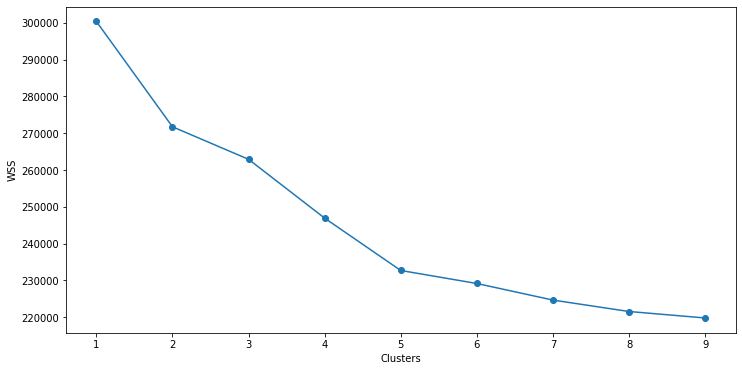

In [280]:
plt.figure(figsize=(12,6))
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.xticks(np.arange(min(wss_df['num of clusters']),max(wss_df['num of clusters'])+1,1))
plt.plot(wss_df['num of clusters'],wss_df['cost'],marker='o')
plt.show()

### take cluster=5 

In [281]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(clust_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 18402, cost: 232724.0
Run 1, iteration: 2/100, moves: 5228, cost: 232724.0


In [282]:
new_df = pd.read_csv('significant.csv')
new_df['cluster_size'] = fitClusters_cao

In [283]:
new_df.head()

,race,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_patient_interaction,numchange,cluster_size
0,Caucasian,0-40,na,na,1,41,1,"Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...",1,not_tested,not tested,No,No,0,0,0,3
1,Caucasian,0-40,emergency,discharged_home,3,59,18,"Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...","Endocrine, Nutritional and Metabolic Diseases ...",9,not_tested,not tested,Yes,Yes,0,0,1,2
2,AfricanAmerican,0-40,emergency,discharged_home,2,11,13,"Complications of Pregnancy, Childbirth and the...","Endocrine, Nutritional and Metabolic Diseases ...",Supplementary Factors Influencing Health Statu...,6,not_tested,not tested,No,Yes,0,3,0,0
3,Caucasian,0-40,emergency,discharged_home,2,44,16,Infectious and Parasitic Disease,"Endocrine, Nutritional and Metabolic Diseases ...",Diseases of circulatory system,7,not_tested,not tested,Yes,Yes,0,0,1,0
4,Caucasian,41-70,emergency,discharged_home,1,51,8,Neoplasms,Neoplasms,"Endocrine, Nutritional and Metabolic Diseases ...",5,not_tested,not tested,Yes,Yes,0,0,0,2


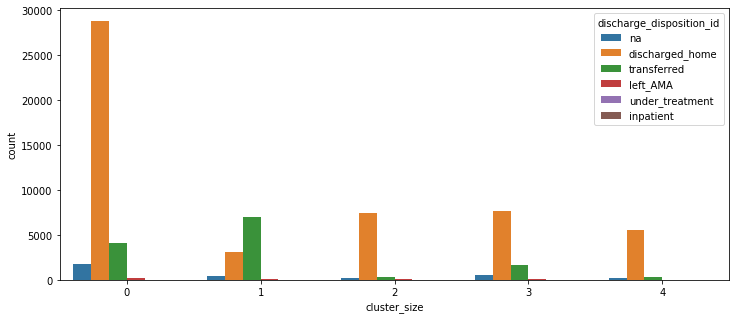

In [284]:
plt.figure(figsize=(12,5))
sns.countplot(new_df['cluster_size'],hue=new_df['discharge_disposition_id'])
plt.show()

## Inferences

*From the above plot, we observe that discharged_home category is very high in number except in the cluster '1'. Cluster 1 has dominant number of transferred patients.*

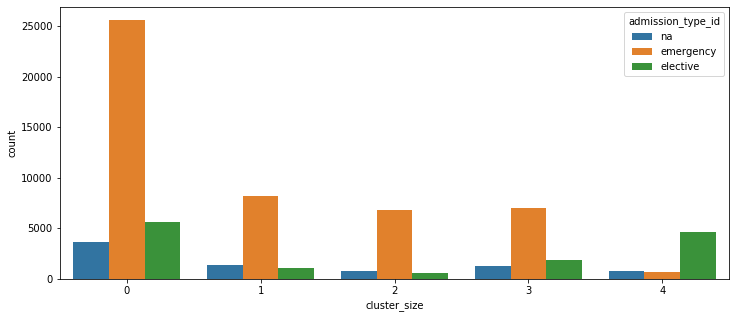

In [286]:
plt.figure(figsize=(12,5))
sns.countplot(new_df['cluster_size'],hue=new_df['admission_type_id'])
plt.show()

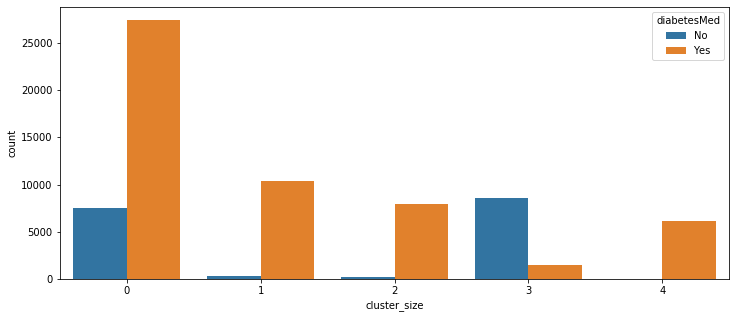

In [285]:
plt.figure(figsize=(12,5))
sns.countplot(new_df['cluster_size'],hue=new_df['diabetesMed'])
plt.show()

## Inferences
*Since our data has significantly greater number of patients under diabetes medications, so most clusters have 'Yes' category greater in number except cluster '3'. Cluster '3' is unique since it consists of patients under 'No' diabetesMed category.*

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

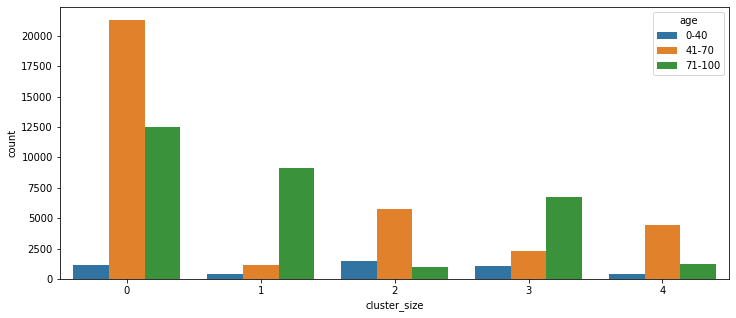

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(new_df['cluster_size'],hue=new_df['age'])
plt.show()

## Inferences

*The age group 41-70 is highest while age group 0-40 are lowest in number in our data so most clusters have the same distribution except clusters '1' and '3'. The cluster '1' and '3' consists of patients belonging to age 71-100.*

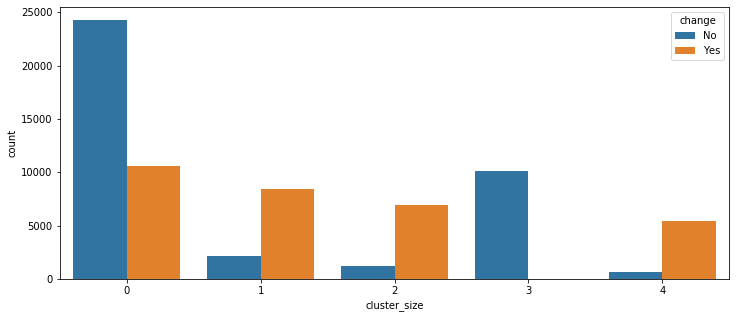

In [287]:
plt.figure(figsize=(12,5))
sns.countplot(new_df['cluster_size'],hue=new_df['change'])
plt.show()

## Inferences
*The clusters '0' and '3' consists of patients having 'No' change of medications while other clusters consists of patients having 'Yes' change*